# Research on Apartment Sale Listings

You have access to data from the Yandex Real Estate service—an archive of apartment sale listings in St. Petersburg and neighboring settlements over several years. Your task is to learn how to determine the market value of real estate properties. To achieve this, perform an exploratory data analysis and identify the parameters that influence property prices. This will enable the development of an automated system that can detect anomalies and fraudulent activity.

Each apartment listing provides two types of data. The first type is entered by the user, while the second type is generated automatically based on map data. For instance, distances to the city center, the airport, and other landmarks are automatically obtained from geoservices. Information about the number of parks and water bodies is also filled in without user input.

### Open the data file and review the general information.

Load the data from the CSV file into a DataFrame using the pandas library. The original CSV file uses a backslash as a delimiter, so we add the sep= argument to the .read_csv() function to correctly separate columns in the DataFrame.

In [12]:
import pandas as pd

In [13]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')

In [14]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


As part of the data exploration process, let's create histograms for all numeric columns in the table. We'll use the .hist() method and apply it to the entire DataFrame data.

On the resulting graphs, such as the histograms for last_price or ceiling_height, we notice that most values cluster around zero. This might indicate that some column values are stored in incorrect formats, contain outliers, or are missing altogether. We'll take a closer look at the data in the following sections.

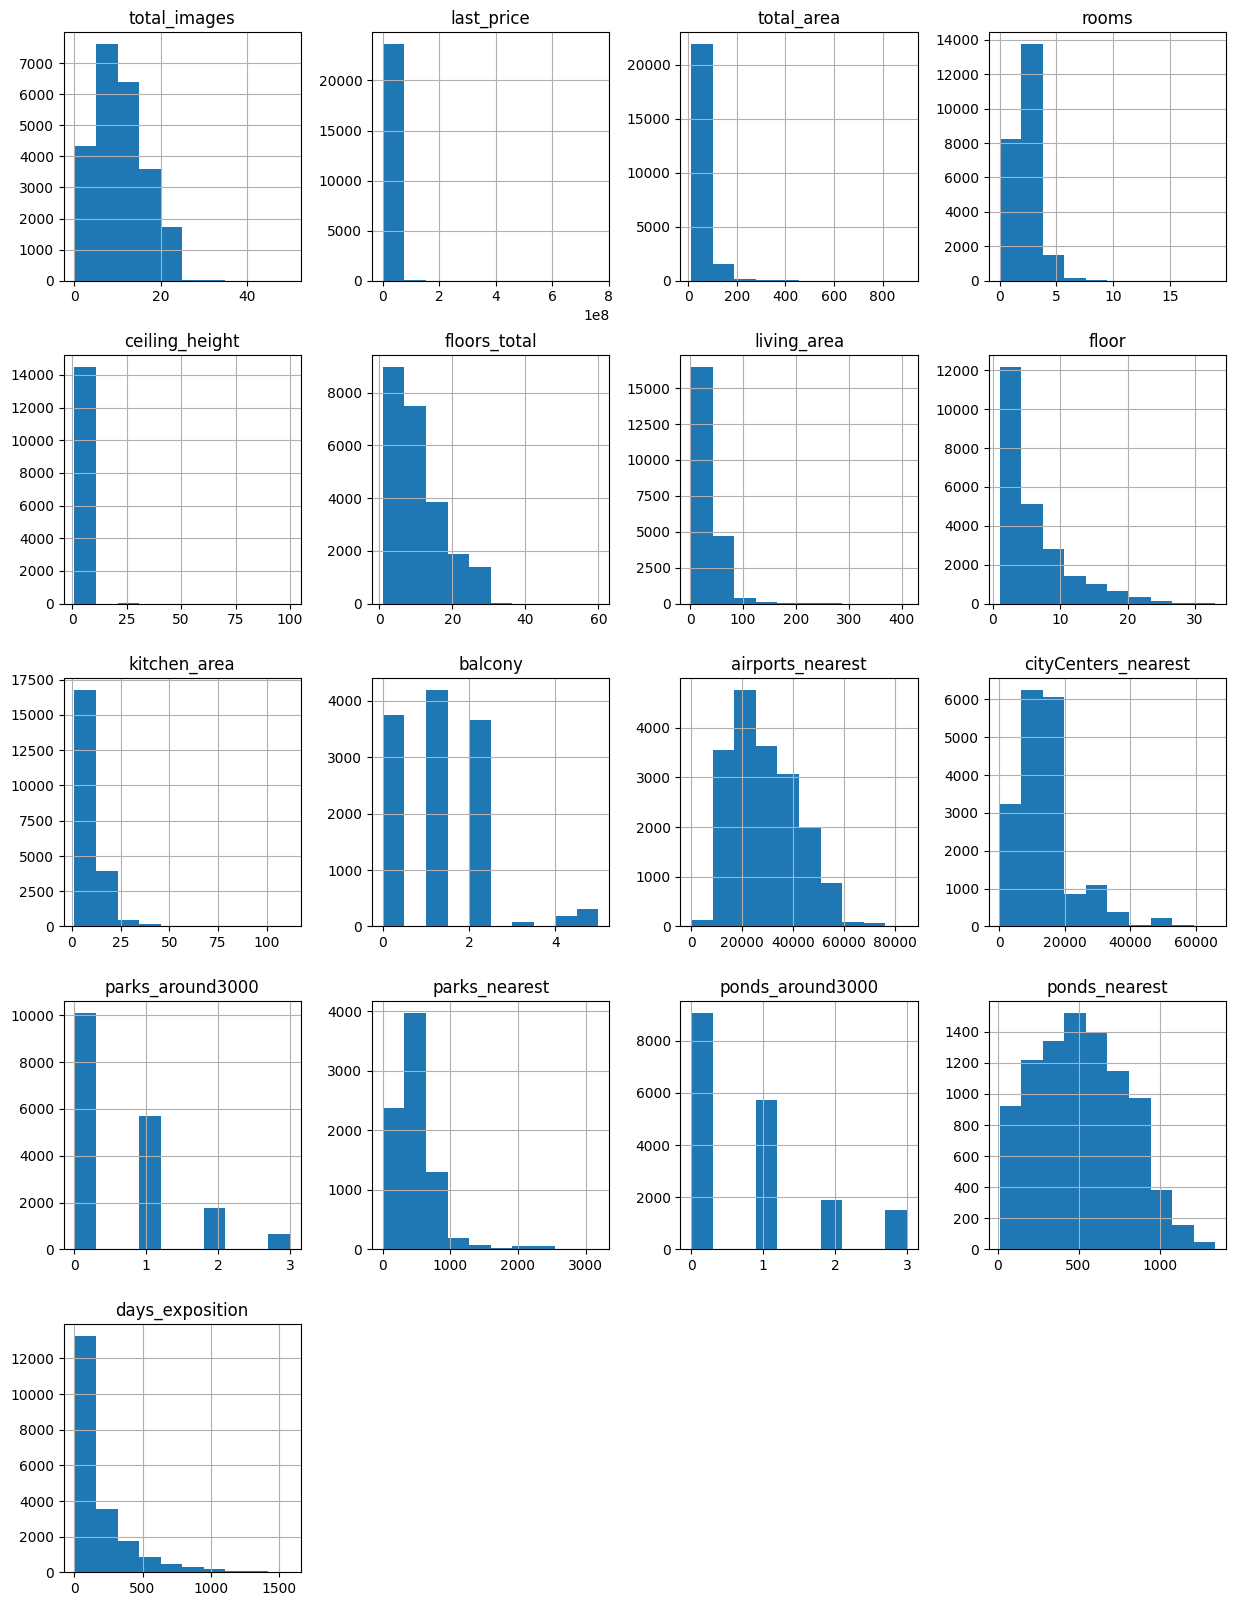

In [15]:
data.hist(figsize=(15, 20));

###  Data Preprocessing

Let’s proceed to data preprocessing. We will identify and examine missing values in the columns using a combination of the methods .isna().sum(). In the output of the function, we observe a large number of columns with missing values. Missing values are not present in the first five columns, in the floor column, or in the studio and open_plan columns.

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Let’s try analyzing the columns with missing values. For missing values that can be replaced, we will perform the replacement; for those where replacement is not possible, we will leave them as they are.

Unfortunately, for some columns, such as ceiling_height, floors_total, and locality_name, replacing the missing values with logical estimates would be inappropriate due to the unique characteristics of each property. The missing data might not have been provided by sellers when posting their listings or could have resulted from issues during data collection and processing.

For the columns living_area and kitchen_area, it is also necessary to request information from the listing owner, as these parameters may have been omitted due to oversight.

Missing values in the days_exposition column are likely due to technical issues, as the time of posting and removal of listings is typically recorded by the platform. These missing values will also remain unchanged since each listing is unique, and it is difficult to identify patterns for imputation.

The large number of missing values in the columns airports_nearest, cityCenters_nearest, parks_nearest, and ponds_nearest could indicate problems with the geoservice or technical difficulties during data collection.

Normally, the platform should automatically populate these fields based on the property's location data. However, if a significant number of missing values are observed in these columns, there may be issues with geodata processing or availability.

Manually filling in these data points for each listing could be an extremely labor-intensive process, requiring the review of each listing individually.

Missing values in the columns is_apartment, balcony, parks_around3000, and ponds_around3000 can be interpreted as the absence of certain features (e.g., no balcony or no parks in the immediate vicinity). We will replace them with the value 0 using a loop and the .fillna() method with 0 as the argument.

In [17]:
columns_to_replace = ['is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

Let's check if this method has resolved the missing values in the specified columns. For this, we'll use the same combination of methods, .isna().sum().

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In the next part of the analysis, we will work with data types. We will examine the data types in the columns and identify any columns where the data type needs to be changed. To do this, we will call the .info() method.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The following columns need to have their data types changed:

- first_day_exposition: the data is stored in the object format, although it represents a date and time. We will convert it to the datetime64 format.
- is_apartment: these data represent boolean values and should be stored in the dataframe in the bool format.
- balcony, floors_total, parks_around3000, ponds_around3000, days_exposition: these columns indicate the quantity of something (balconies, floors, etc.). Quantity should not be stored as float64, so we will change it to the int64 format.

Let's start with the first_day_exposition column. To do this, we will use the .to_datetime() method.

In [20]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='ISO8601'
)
display(data.info()) # Checking the format of the first_day_exposition column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

Let's continue with the is_apartment column. For this, we will use the .astype() method.

In [21]:
data['is_apartment'] = data['is_apartment'].astype('bool')
display(data.info()) # Let's check the format of the is_apartment column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

Let's move on to the columns balcony, floors_total, parks_around3000, ponds_around3000, and days_exposition, where we will use the same method .astype() to change the values from float64 to int64.

In [22]:
columns_to_right_format = ['balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_right_format:
    data[column] = data[column].astype('int')

In [23]:
display(data.info()) # Let's check the format of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

Let's display the first 20 rows of the dataframe and see the changes we made:

In [24]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Let's examine the unique values in the column with names (locality_name) and remove any implicit duplicates. To do this, we will use the .unique() method.

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
data['locality_name'].nunique()

364

We will use the .replace() method to remove implicit duplicates.

In [27]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок Мурино', 'Мурино', regex=True)
    .replace('Деревня Кудрово', 'Кудрово', regex=True)
    .replace ('Никольское', 'село Никольское', regex=True)
    .replace ('городской поселок', 'поселок городского типа', regex=True)
    .replace ('поселок станции', 'поселок при железнодорожной станции',regex=True)
)

We check unique values using the .unique() and .nunique() methods.

In [28]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово',
       'Коммунар', 'Колпино', 'поселок городского типа Красный Бор',
       'Гатчина', 'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет',

In [29]:
data['locality_name'].nunique()

320

### Add New Columns to the Table

Let's add the following columns to the dataframe:

- The price per square meter;
- The day of the week the listing was published (0 for Monday, 1 for Tuesday, and so on);
- The month the listing was published;
- The year the listing was published;
- The floor type of the apartment ("first", "last", "other");
- The distance to the city center in kilometers.

Let's start with the price per square meter. We will create a new column named price_sqr_meter. To calculate it, we divide the price of the property by its area and round the result to two decimal places.

In [30]:
data['price_sqr_meter'] = round((data['last_price'] / data['total_area']),2)

In [31]:
display(data.head(20)) # Check if the calculation for the new column price_sqr_meter worked correctly

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59


Let's add the publication day identifier: Monday = 0, Tuesday = 1, and so on. We'll name the new column weekday and use the dt.weekday method to get the weekday identifier:

In [32]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [33]:
display(data.head(20)) # Let's check if the method worked correctly for the new weekday column.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6


Let's add a column with the name of the month. We'll extract the month name from the first_day_exposition column by converting the time to the DatetimeIndex class and then applying the month attribute.

In [34]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [35]:
display(data.head(20)) # Let's check if the method worked correctly for the new month column.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2


Let's add a column for the year. We will extract the year from the first_day_exposition column by converting the time to the DatetimeIndex class and applying the year attribute.

In [36]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [37]:
display(data.head(20)) # Let's check if the method worked correctly for the new column year.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017


Let's add another new column to the dataframe called floor_type, which will include three categories: "first," "last," and "other." For this, we'll create a new function def that includes a conditional structure

In [38]:
def floor_type_maker(row):
    flat_floor = row['floor']
    total_floors = row['floors_total']
    
    if flat_floor == 1:
        return 'первый'
    if flat_floor == total_floors:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type_maker, axis=1)

In [39]:
display(data.head(20)) # Check if the method for the new floor_type column worked correctly.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой


Let's create the final new column in the dataframe, cityCenters_nearest_meters, which converts the distance to the city center from the cityCenters_nearest column from meters to kilometers. To do this, we will divide all values in the cityCenters_nearest column by 1000 and round to the nearest integer.

In [40]:
data['cityCenters_nearest_meters'] = round(data['cityCenters_nearest']/1000)

In [41]:
display(data.head(20)) # Let's check if the method worked correctly for the new cityCenters_nearest_meters column

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,NaN,0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Exploratory Data Analysis

Let's build separate histograms for each of the following parameters:

- Total area
- Living area
- Kitchen area
- Object price
- Number of rooms
- Ceiling height
- Floor type ("first," "last," "other")
- Total number of floors in the building
- Distance to the city center in meters
- Distance to the nearest park

In some parameters, we encounter rare and outlier values. We will try to explain them. If it's an error, we will attempt to handle them by restoring the correct value. If we cannot find the reason, we will simply remove rows from the DataFrame with rare or outlier values.

Let's start with the parameter "total area." We will create a histogram using the .hist() method.

<Axes: >

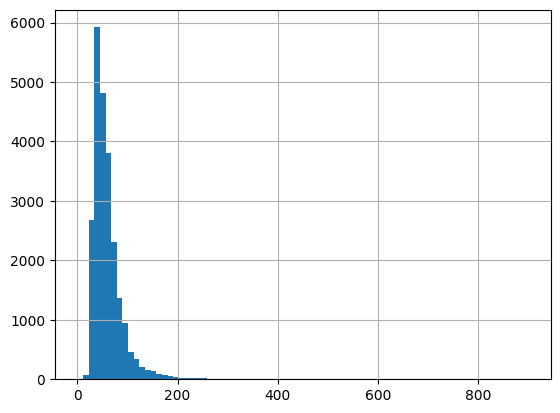

In [42]:
data['total_area'].hist(bins=80,range=(0,900))

The histogram on the X-axis has a range from the minimum (12) to the maximum (900). On the Y-axis, it ranges from 0 to 6000. The average value is approximately 60, so the histogram is centered around this value. However, since the maximum value is 900, we observe some outliers that deviate from the average, forming a long "tail" on the graph.

In [43]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

The mean and median are close to each other, which may indicate the absence of significant outliers. However, looking at the maximum and minimum values, we can confidently say that there are outliers in the data. Let's take a look at the smaller apartments in St. Petersburg (most of them are located there).

In [44]:
data.query('total_area < 20 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5.0,9.00,2,False,...,349.0,1,963.0,9.0,183333.33,2,11,2018,другой,5.0
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6.0,NaN,2,False,...,238.0,3,374.0,44.0,118421.05,1,3,2019,другой,7.0
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19.0,15.80,1,False,...,NaN,1,1127.0,128.0,71808.51,2,11,2017,первый,14.0
8886,10,2450000.0,15.50,2018-08-22,0,NaN,5.0,10.00,2,False,...,NaN,1,446.0,27.0,158064.52,2,8,2018,другой,5.0
9157,0,3400000.0,17.60,2018-03-18,1,NaN,5.0,15.00,2,False,...,336.0,1,309.0,117.0,193181.82,6,3,2018,другой,2.0
9412,5,2100000.0,16.00,2017-12-10,0,NaN,6.0,13.00,1,False,...,228.0,3,72.0,3.0,131250.00,6,12,2017,первый,2.0
9817,8,2190000.0,19.00,2018-10-12,0,3.50,5.0,15.00,1,False,...,383.0,1,781.0,89.0,115263.16,4,10,2018,первый,8.0
10208,3,1900000.0,17.00,2018-08-14,1,2.75,4.0,13.00,2,False,...,NaN,0,NaN,7.0,111764.71,1,8,2018,другой,6.0
12996,8,1900000.0,18.00,2019-01-25,0,2.60,5.0,16.00,3,False,...,149.0,2,496.0,10.0,105555.56,4,1,2019,другой,16.0
16949,9,1550000.0,15.00,2018-08-21,1,2.70,9.0,NaN,1,False,...,NaN,1,1079.0,42.0,103333.33,1,8,2018,первый,16.0


It is likely referring to rooms in communal apartments. We will keep this data, as it is quite relevant. 

Let's look at the large apartments (over 250 square meters), and also add a condition that the living area of the apartments is half the size of their total area.

In [45]:
data.query('total_area > 250 and total_area > 2*living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
4536,25,26000000.0,290.0,2017-11-16,5,2.80,17.0,141.00,16,False,...,NaN,1,153.0,120.0,89655.17,3,11,2017,другой,6.0
6621,20,99000000.0,488.0,2017-04-09,5,2.95,20.0,216.00,17,False,...,646.0,1,368.0,351.0,202868.85,6,4,2017,другой,5.0
7674,20,131000000.0,380.0,2016-09-23,5,3.90,6.0,150.00,4,False,...,161.0,1,635.0,901.0,344736.84,4,9,2016,другой,5.0
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.10,1,False,...,471.0,2,440.0,471.0,125550.00,2,7,2017,первый,17.0
8900,13,190870000.0,268.0,2016-03-25,3,NaN,8.0,132.00,7,False,...,NaN,2,198.0,901.0,712201.49,4,3,2016,другой,5.0
9433,20,46000000.0,260.0,2015-01-22,3,2.80,18.0,74.00,18,False,...,NaN,1,213.0,NaN,176923.08,3,1,2015,последний,8.0
9561,2,24900000.0,312.0,2015-11-27,5,3.00,2.0,127.00,2,False,...,287.0,1,203.0,392.0,79807.69,4,11,2015,последний,12.0
10569,13,36900000.0,347.5,2017-09-14,8,NaN,4.0,160.00,1,False,...,1809.0,2,241.0,249.0,106187.05,3,9,2017,первый,34.0
11319,3,26450000.0,284.0,2018-02-01,4,NaN,6.0,130.30,5,False,...,NaN,0,NaN,145.0,93133.80,3,2,2018,другой,4.0
13139,20,55000000.0,288.0,2017-11-14,5,3.51,6.0,100.70,2,False,...,175.0,1,682.0,338.0,190972.22,1,11,2017,другой,5.0


These apartments seem implausible, so we will remove them from the dataframe.

In [46]:
data = data.query('not(total_area > 250 and total_area > 2*living_area)')

In [47]:
data['total_area'].describe()

count    23677.000000
mean        60.068948
std         34.182696
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

Взглянем на очень крупные квартиры, чья площадь больше 400 квадратных метров.

In [48]:
data.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.5,4,False,...,461.0,3,22.0,391.0,103223.81,2,10,2017,другой,1.0
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5.0,NaN,5,False,...,NaN,2,210.0,NaN,221870.05,5,3,2019,последний,5.0
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,NaN,6,False,...,NaN,0,NaN,NaN,65136.43,2,1,2019,последний,5.0
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4.0,332.0,3,False,...,477.0,2,540.0,NaN,96711.80,5,10,2017,другой,2.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,False,...,767.0,0,NaN,14.0,110169.49,3,2,2019,другой,5.0
5893,3,230000000.0,500.00,2017-05-31,6,NaN,7.0,NaN,7,False,...,NaN,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3.0,248.7,3,False,...,852.0,3,122.0,179.0,72294.28,6,1,2018,последний,15.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7.0,301.5,7,True,...,110.0,0,NaN,1078.0,165680.47,3,12,2015,последний,6.0
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12.0,NaN,3,False,...,592.0,0,NaN,5.0,87402.00,4,5,2017,другой,7.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7.0,347.5,7,False,...,110.0,0,NaN,14.0,184848.48,0,6,2017,последний,6.0


Apartments with such a large area can be explained for the first and last floors. In the first case, it could refer to commercial premises, and in the second case, to penthouses. However, it is hard to explain apartments with such a large area on other floors. There is suspicion that these values might be outliers, so we will remove them.

In [49]:
data = data.query('not(total_area > 400 and floor_type == "другой")')

In [50]:
data['total_area'].describe()

count    23670.000000
mean        59.945597
std         33.410470
min         12.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        631.200000
Name: total_area, dtype: float64

Let's plot a histogram for the living area using the .hist() method.

<Axes: >

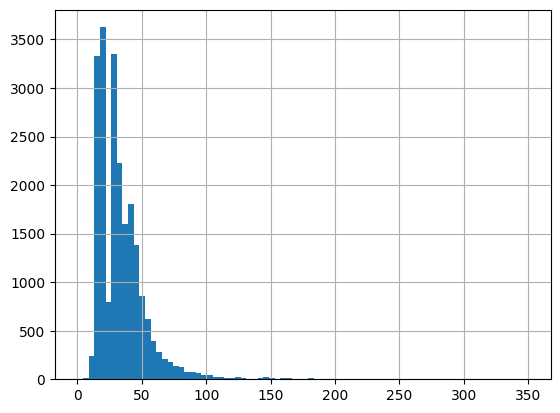

In [51]:
data['living_area'].hist(bins=80,range=(0,350))

The histogram on the X-axis has a range from the minimum (2) to the maximum (347.5). On the Y-axis, the range is from 0 to 5500. The average value is around 34, and we see that the histogram is centered around this value. However, there is another peak between 15 and 20. Also, with a maximum value of 347.5, we observe some values that deviate from the average, represented as a long "tail" on the graph.

In [52]:
data['living_area'].describe()

count    21769.000000
mean        34.281985
std         21.201813
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

The median and the 25th percentile are close to each other, indicating that most of the data is concentrated in this range. 75% of the data is below 42 square meters, which is also visible in the histogram.

Having processed the values in the total area column and removed the outliers, we will leave the living area column as it is.

Let's plot a histogram for the kitchen area using the .hist() method.

<Axes: >

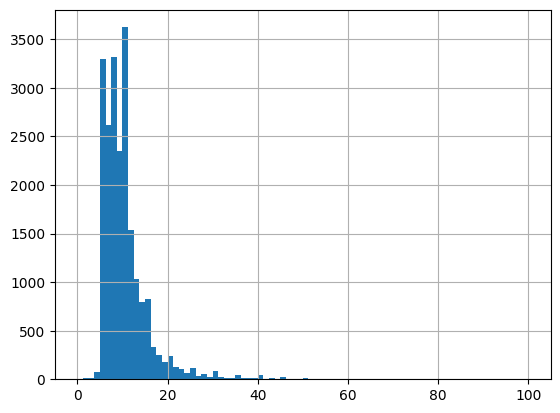

In [53]:
data['kitchen_area'].hist(bins=80,range=(0,100))

The histogram on the X-axis ranges from a minimum value of 1.3 to a maximum value of 107. The Y-axis ranges from 0 to 3600. The average value is approximately 10.5, and we can see that the histogram is concentrated around this value. However, there are two additional peaks around 6 and 8. The maximum value is 107, and we observe a number of values that deviate from the average, represented as a long "tail" on the graph.

In [54]:
data['kitchen_area'].describe()

count    21395.000000
mean        10.533895
std          5.758442
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

The spread of data around the mean is not very large, indicating that the values of the variable are distributed fairly compactly around the average. This is confirmed by the fact that the difference between the 75th and 25th percentiles is not very big, which also suggests a relatively narrow range of data.

There are also large values present. However, we already described them in the column for total area – these data can be kept.

Let's plot a histogram for the property price using the .hist() method.

In [55]:
data['last_price'] = data['last_price']/1000000 # для простоты розделим цену на 1 млн

<Axes: >

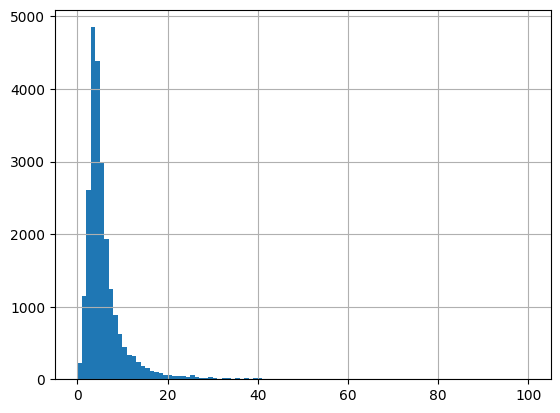

In [56]:
data['last_price'].hist(bins=100, range=(0,100))

The histogram on the X-axis has a range from the minimum (0.012190) to the maximum (763). On the Y-axis, the range is from 0 to 5000. The mean value is approximately 6.45, and we see that the histogram is concentrated around this value. However, the maximum value is 763, and we observe a number of values that deviate from the mean, represented as a long "tail" on the graph.

In [57]:
data['last_price'].describe()

count    23670.000000
mean         6.450882
std         10.135198
min          0.012190
25%          3.400000
50%          4.642000
75%          6.759425
max        763.000000
Name: last_price, dtype: float64

The average property price is approximately 6.54 million, while the median is 4.65 million. The standard deviation is 10.89 million, indicating a large spread of prices. 75% of observations have a price of 6.8 million or less. This all points to a wide range of prices, which is typical for the real estate market, where various types of properties are represented. Let's take a look at the apartment priced at 763 million.

In [58]:
data.query('last_price == 763')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
12971,19,763.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,530.0,3,756.0,33.0,1907500.0,5,9,2017,последний,4.0


When comparing similar apartments by size, we see that the average price is 93 million. Row 12971 is an obvious outlier. Let's remove it. 

In [59]:
data.query('living_area == 250')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
793,20,135.0,310.0,2018-05-22,4,3.3,5.0,250.0,2,False,...,295.0,3,190.0,342.0,435483.87,1,5,2018,другой,7.0
1494,10,65.0,364.0,2018-11-27,7,3.9,6.0,250.0,3,False,...,NaN,1,689.0,46.0,178571.43,1,11,2018,другой,3.0
12971,19,763.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,530.0,3,756.0,33.0,1907500.00,5,9,2017,последний,4.0
15151,15,88.0,400.0,2019-03-27,9,2.5,2.0,250.0,1,False,...,315.0,1,578.0,NaN,220000.00,2,3,2019,первый,3.0
15701,12,83.0,293.6,2017-11-10,4,NaN,9.0,250.0,7,False,...,164.0,0,NaN,NaN,282697.55,4,11,2017,другой,6.0


In [60]:
data = data.query('not(last_price == 763)')

In [61]:
data['last_price'].describe()

count    23669.000000
mean         6.418918
std          8.862416
min          0.012190
25%          3.400000
50%          4.640000
75%          6.757702
max        401.300000
Name: last_price, dtype: float64

Let's look at other large values in the column last_price > 150.

In [62]:
data.query('last_price > 150')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
1026,20,155.0000,310.0,2018-10-12,5,5.30,3.0,190.0,3,False,...,NaN,1,603.0,NaN,500000.00,4,10,2018,последний,5.0
1436,19,330.0000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,519.0,3,285.0,233.0,1736842.11,2,4,2018,другой,1.0
2536,16,159.9840,242.4,2015-08-27,4,3.85,9.0,131.0,7,False,...,679.0,1,227.0,501.0,660000.00,3,8,2015,другой,2.0
5893,3,230.0000,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,NaN,2,198.0,50.0,460000.00,2,5,2017,последний,5.0
13749,7,240.0000,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,NaN,2,198.0,199.0,585365.85,5,4,2017,последний,5.0
14706,15,401.3000,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,545.0,1,478.0,393.0,1000748.13,5,2,2016,последний,2.0
16461,17,245.0000,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,400.0,3,140.0,249.0,857542.88,0,4,2017,другой,6.0
16495,12,159.0000,260.0,2017-04-04,4,NaN,5.0,180.0,4,False,...,138.0,3,620.0,178.0,611538.46,1,4,2017,другой,0.0
19155,20,160.0000,243.0,2018-11-12,5,NaN,5.0,145.0,4,False,...,285.0,1,200.0,18.0,658436.21,0,11,2018,другой,1.0
19865,20,180.0000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,...,537.0,3,501.0,834.0,518731.99,2,1,2015,другой,4.0


The rows with indices 1436, 14706, 16461, and 22831 raise questions. The price is clearly not comparable to the apartment area. Additionally, I would remove the row with index 19540 from the dataframe because its value significantly deviates from the others.

In [63]:
data = data.query('last_price != 330 and last_price != 401.3 and last_price != 245 and last_price != 289.2384 and last_price != 420 and last_price != 300 and last_price != 230 and last_price != 240 and last_price != 190.87')

In [64]:
data['last_price'].describe()

count    23663.000000
mean         6.347202
std          7.572176
min          0.012190
25%          3.400000
50%          4.635000
75%          6.750000
max        180.000000
Name: last_price, dtype: float64

In [65]:
data.query('last_price > 150')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
1026,20,155.000,310.0,2018-10-12,5,5.30,3.0,190.0,3,False,...,NaN,1,603.0,NaN,500000.00,4,10,2018,последний,5.0
2536,16,159.984,242.4,2015-08-27,4,3.85,9.0,131.0,7,False,...,679.0,1,227.0,501.0,660000.00,3,8,2015,другой,2.0
16495,12,159.000,260.0,2017-04-04,4,NaN,5.0,180.0,4,False,...,138.0,3,620.0,178.0,611538.46,1,4,2017,другой,0.0
19155,20,160.000,243.0,2018-11-12,5,NaN,5.0,145.0,4,False,...,285.0,1,200.0,18.0,658436.21,0,11,2018,другой,1.0
19865,20,180.000,347.0,2015-01-21,8,3.90,6.0,260.0,3,False,...,537.0,3,501.0,834.0,518731.99,2,1,2015,другой,4.0


Let's take a look at the small values.

In [66]:
data.query('last_price < 0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
5698,7,0.45000,42.0,2017-07-31,2,NaN,1.0,23.0,1,False,...,NaN,0,NaN,233.0,10714.29,0,7,2017,первый,NaN
6859,6,0.49000,40.0,2017-12-11,1,NaN,5.0,NaN,3,False,...,NaN,0,NaN,43.0,12250.00,0,12,2017,другой,NaN
8793,7,0.01219,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,805.0,0,NaN,8.0,111.83,2,3,2019,последний,9.0
9581,7,0.45000,43.4,2018-08-31,2,NaN,5.0,30.3,3,False,...,NaN,0,NaN,96.0,10368.66,4,8,2018,другой,NaN
10782,3,0.49000,29.1,2016-05-05,1,2.50,5.0,17.0,5,False,...,NaN,0,NaN,719.0,16838.49,3,5,2016,последний,NaN
14911,5,0.43000,54.0,2018-06-26,2,NaN,3.0,NaN,3,False,...,NaN,0,NaN,44.0,7962.96,1,6,2018,последний,NaN
16032,8,0.48000,32.0,2019-01-06,1,NaN,2.0,16.0,1,False,...,NaN,0,NaN,83.0,15000.00,6,1,2019,первый,NaN
16219,14,0.45000,38.5,2018-07-11,2,2.65,2.0,NaN,1,False,...,NaN,0,NaN,45.0,11688.31,2,7,2018,первый,NaN
16274,18,0.44000,40.0,2018-07-10,1,NaN,5.0,NaN,1,False,...,NaN,0,NaN,45.0,11000.00,1,7,2018,первый,NaN
17456,7,0.43000,30.4,2019-04-22,1,NaN,2.0,16.0,1,False,...,NaN,0,NaN,NaN,14144.74,0,4,2019,первый,NaN


The value of 12,190 rubles for a 109 square meter apartment seems suspicious. It will be removed.

In [67]:
data = data.query('last_price != 0.01219')

In [68]:
data['last_price'].describe()

count    23662.000000
mean         6.347470
std          7.572224
min          0.430000
25%          3.400000
50%          4.635500
75%          6.750000
max        180.000000
Name: last_price, dtype: float64

The manipulations we performed reduced the standard deviation by 3 million rubles and brought the mean value closer to the median, while keeping most of the rows in the dataframe and removing those that significantly deviated from the rest of the data and raised suspicion.

Let's plot a histogram for the number of rooms using the .hist() method.

<Axes: >

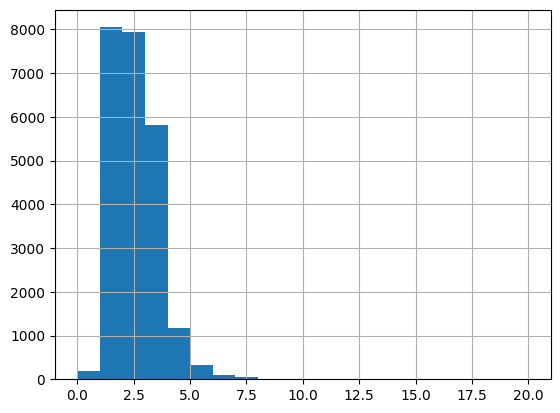

In [69]:
data['rooms'].hist(bins=20,range=(0,20))

Since the number of rooms in the dataframe is recorded in the int64 format, the histogram shows several peaks for 1- and 2-room apartments.

In [70]:
data['rooms'].describe()

count    23662.000000
mean         2.065083
std          1.065097
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Apartments with 0 rooms raise suspicion, as this is unlikely. It is more probable that the seller forgot to indicate the number of rooms in the apartment.

In [71]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
144,1,2.450,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,0,NaN,181.0,90740.74,3,3,2017,другой,NaN
349,4,2.320,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,NaN,0,NaN,45.0,92800.00,2,9,2017,первый,NaN
440,8,2.480,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3.375,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,NaN,1,593.0,430.0,98110.47,1,3,2017,другой,19.0
608,2,1.850,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,0,NaN,29.0,74000.00,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.200,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,...,NaN,1,623.0,14.0,123076.92,4,9,2017,другой,13.0
23442,0,2.500,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,...,NaN,0,NaN,4.0,90252.71,3,9,2017,другой,NaN
23554,15,3.350,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,NaN,2,112.0,31.0,128846.15,4,9,2018,другой,17.0
23592,10,1.450,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,...,NaN,0,NaN,82.0,50000.00,5,11,2017,другой,NaN


Let's remove these rows from the dataframe.

In [72]:
data = data.query('rooms != 0')

In [73]:
data['rooms'].describe()

count    23465.000000
mean         2.082421
std          1.052545
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Also, apartments with a large number of rooms are concerning. Let's take a look at them.

In [74]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
648,3,17.500,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,NaN,0,NaN,NaN,95264.02,6,7,2018,последний,3.0
866,5,25.000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,NaN,2,435.0,418.0,68870.52,5,12,2017,другой,8.0
9688,8,33.000,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,686.0,2,66.0,813.0,170015.46,1,2,2017,другой,1.0
14498,6,32.250,374.6,2018-06-09,19,NaN,5.0,264.5,2,False,...,NaN,2,548.0,114.0,86091.83,5,6,2018,другой,4.0
18848,6,28.500,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,516.0,0,NaN,1365.0,105555.56,0,3,2015,последний,4.0
20829,6,28.659,245.4,2016-03-31,14,NaN,4.0,168.3,2,False,...,541.0,2,118.0,95.0,116784.84,3,3,2016,другой,2.0


In apartments with a living area of less than 200 square meters, it's unlikely to have 10 or more rooms. Let's remove these rows from the dataframe.

In [75]:
data = data.query('not (rooms > 10) and living_area < 200')

In [76]:
data['rooms'].describe()

count    21553.000000
mean         2.076416
std          1.024639
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

Let's plot a histogram for the ceiling height using the .hist() method.

<Axes: >

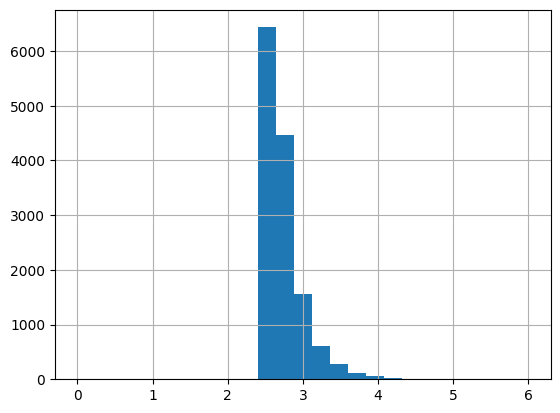

In [77]:
data['ceiling_height'].hist(bins=25,range=(0,6))

The peak of the histogram is at 2.5, which seems reasonable. However, there are also some strange values. Let's investigate further below.

In [78]:
data['ceiling_height'].describe()

count    13590.000000
mean         2.769488
std          1.282745
min          1.000000
25%          2.512500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

The maximum value is 100, which could indicate the presence of outliers in the data. Let's take a closer look at them.

In [79]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
355,17,3.600,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,0,NaN,259.0,65217.39,3,7,2018,другой,NaN
3148,14,2.900,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,NaN,0,NaN,NaN,38666.67,0,11,2018,другой,NaN
4643,0,4.300,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,658.0,1,331.0,181.0,95555.56,3,2,2018,другой,13.0
5076,0,3.850,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,397.0,1,578.0,7.0,126229.51,2,10,2018,первый,8.0
5246,0,2.500,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,NaN,0,NaN,540.0,46296.30,4,10,2017,другой,NaN
5669,4,4.400,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,305.0,0,NaN,267.0,88000.00,1,8,2017,другой,11.0
5807,17,8.150,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,NaN,3,80.0,38.0,101875.00,2,1,2019,другой,20.0
6246,6,3.300,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,417.0,2,73.0,NaN,74324.32,0,3,2019,последний,51.0
9379,5,3.950,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,NaN,0,NaN,NaN,94047.62,6,3,2017,другой,14.0
10773,8,3.800,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,NaN,0,NaN,71.0,65517.24,4,10,2017,другой,NaN


The ceiling_height column shows ceiling heights of 25 m and 32 m. It is reasonable to assume that these should actually be 2.5 m and 3.2 m, respectively. We will simply remove the value 100 from the dataframe.

In [80]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 32, 3.2)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 25, 2.5)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 24, 2.4)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 27, 2.7)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 26, 2.6)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] != 27.5, 2.75)

In [81]:
data = data.query('ceiling_height != 100')

In [82]:
data['ceiling_height'].describe()

count    13589.000000
mean         2.727357
std          0.344218
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

The ceiling height cannot be less than 2 meters. Let's see how many such values we can find.

In [83]:
data.loc[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
5712,5,1.5,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,NaN,0,NaN,248.0,35046.73,0,8,2017,первый,NaN
16934,5,4.1,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,NaN,3,80.0,71.0,102500.00,1,10,2017,другой,20.0
22590,16,6.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,293.0,2,289.0,13.0,109090.91,2,10,2018,другой,14.0


We will delete them

In [84]:
data = data.query('not (ceiling_height < 2)')

In [85]:
data['ceiling_height'].describe()

count    13586.000000
mean         2.727668
std          0.343585
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Kitchens with a ceiling height above 6 meters are also concerning.

In [86]:
data.loc[data['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_meter,weekday,month,year,floor_type,cityCenters_nearest_meters
3474,3,1.40,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,NaN,0,NaN,125.0,46666.67,4,3,2018,другой,NaN
5863,20,5.65,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,NaN,1,613.0,14.0,125555.56,2,8,2018,другой,11.0
15061,19,5.60,56.4,2018-05-11,2,14.0,14.0,32.4,5,False,...,NaN,0,NaN,315.0,99290.78,4,5,2018,другой,14.0
15743,14,5.60,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,723.0,0,NaN,474.0,83582.09,4,11,2016,первый,11.0
17442,0,5.35,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,0,NaN,469.0,99074.07,1,6,2015,другой,28.0
17496,15,6.70,92.9,2019-02-19,3,20.0,17.0,53.2,14,False,...,967.0,0,NaN,NaN,72120.56,1,2,2019,другой,15.0
22309,20,5.30,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,...,440.0,2,450.0,136.0,117777.78,5,9,2017,другой,12.0


We will delete them

In [87]:
data = data.query('not (ceiling_height > 6)')

In [88]:
data['ceiling_height'].describe()

count    13579.000000
mean         2.723433
std          0.272235
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

The standard deviation has been minimized. The data characteristics now appear much healthier.

Let's build a histogram for the floor type of the apartment using the .hist() method.

<Axes: >

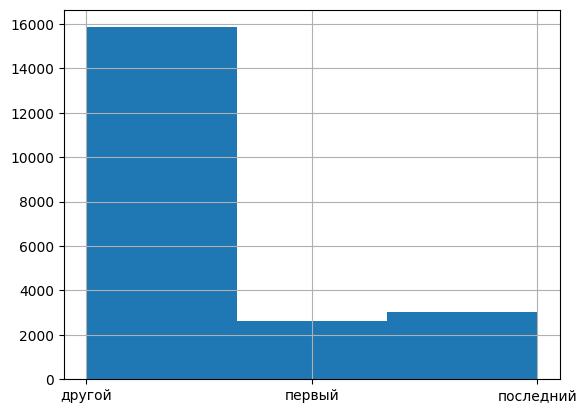

In [89]:
data['floor_type'].hist(bins=3)

The data looks normal – most of the apartments are not on the first and last floors.

Let's build a histogram for the total number of floors in the building using the .hist() method.

<Axes: >

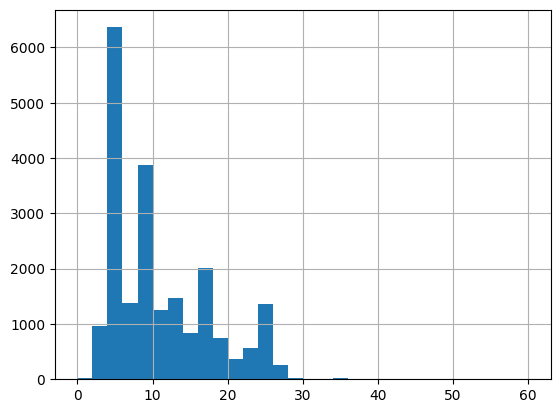

In [90]:
data['floors_total'].hist(bins=30,range=(0,60))

The peak occurs at 5 and 10 floors. It looks plausible.

In [91]:
data['floors_total'].describe()

count    21490.000000
mean        10.601117
std          6.541280
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

The data looks fine.

Let's plot a histogram for the distance to the city center in meters using the .hist() method.

<Axes: >

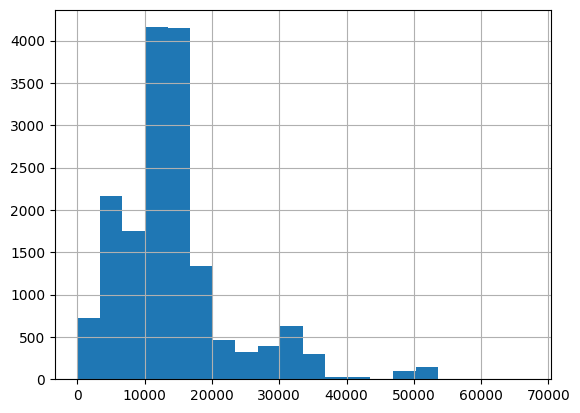

In [92]:
data['cityCenters_nearest'].hist(bins=20,range=(0,67000))

In [93]:
data['cityCenters_nearest'].describe()

count    16722.000000
mean     14267.759957
std       8682.358449
min        181.000000
25%       9360.000000
50%      13117.000000
75%      16280.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

The data looks fine.

Let's plot a histogram for the distance to the nearest park using the .hist() method.

<Axes: >

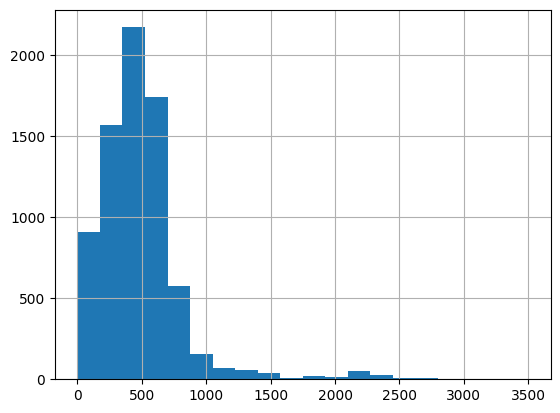

In [94]:
data['parks_nearest'].hist(bins=20,range=(0,3500))

In [95]:
data['parks_nearest'].describe()

count    7432.000000
mean      487.710710
std       337.907137
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

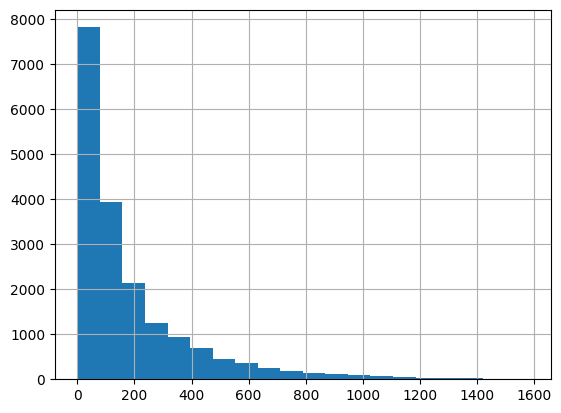

In [96]:
data['days_exposition'].hist(bins=20,range=(0,1580))

In [97]:
data['days_exposition'].describe()

count    18581.000000
mean       185.298100
std        221.272778
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Fast sales can be considered those that are completed within the first quartile (25%) of the sales time, i.e., less than 45 days. Sales that take more than 238 days (75% of all sales) can be considered unusually long.

<Axes: >

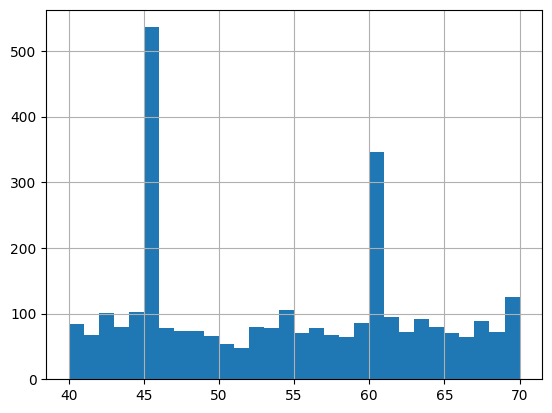

In [98]:
data['days_exposition'].hist(bins=30,range=(40,70))

Let's calculate the dependence of price on total area.

In [99]:
price_tarea = data.pivot_table(index='last_price', values='total_area')
price_tarea.reset_index(inplace=True)

<Axes: xlabel='last_price', ylabel='total_area'>

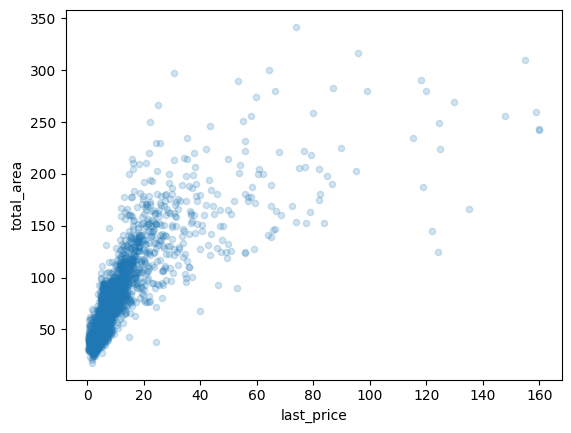

In [100]:
price_tarea.plot(x='last_price', y='total_area',kind='scatter', alpha=0.2)

In [101]:
price_tarea.corr()

,last_price,total_area
last_price,1.000000,0.778435
total_area,0.778435,1.000000


The correlation coefficient of 0.778435 indicates a strong positive linear relationship between the apartment's price and its total area — the larger the apartment's area, the higher its price, and vice versa.

Let's calculate the correlation between the price and the total area.

In [102]:
price_larea = data.pivot_table(index='last_price',values='living_area')
price_larea.reset_index(inplace=True)

<Axes: xlabel='last_price', ylabel='living_area'>

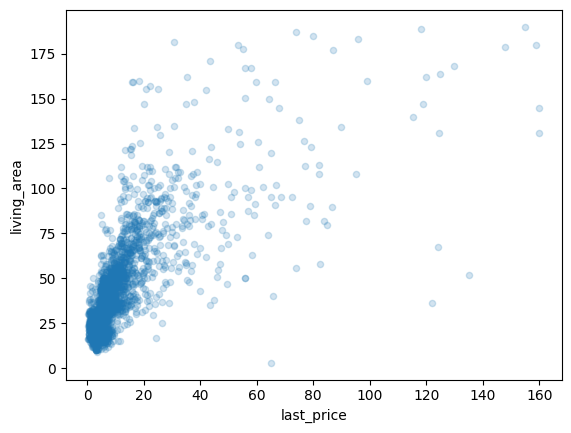

In [103]:
price_larea.plot(x='last_price', y='living_area',kind='scatter', alpha=0.2)

In [104]:
price_larea.corr()

,last_price,living_area
last_price,1.000000,0.718675
living_area,0.718675,1.000000


The correlation coefficient of 0.718675 indicates a strong positive linear relationship between the apartment price and its living area— the larger the living area of the apartment, the higher its price, and vice versa.

Let's calculate the correlation between the price and the kitchen area.

In [105]:
price_karea = data.pivot_table(index='last_price',values='kitchen_area')
price_karea.reset_index(inplace=True)

<Axes: xlabel='last_price', ylabel='kitchen_area'>

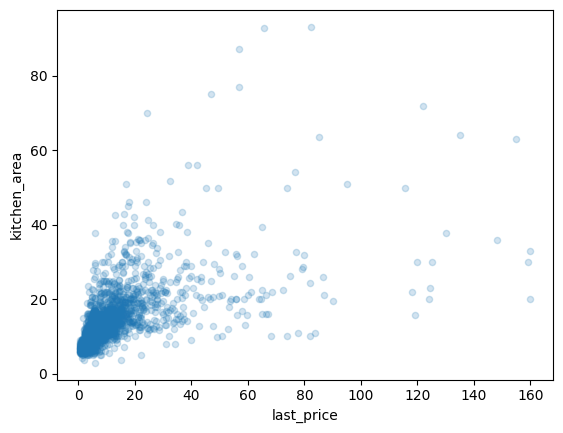

In [106]:
price_karea.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

In [107]:
price_karea.corr()

,last_price,kitchen_area
last_price,1.000000,0.596418
kitchen_area,0.596418,1.000000


Here, a positive linear correlation is also observed, but its nature can be described as moderate. This means that as the kitchen area increases, the price of the apartment also tends to increase, and vice versa.

Let's calculate the correlation between the price and the number of rooms.

In [108]:
price_rooms = data.pivot_table(index='last_price',values='rooms')
price_rooms.reset_index(inplace=True)

<Axes: xlabel='last_price', ylabel='rooms'>

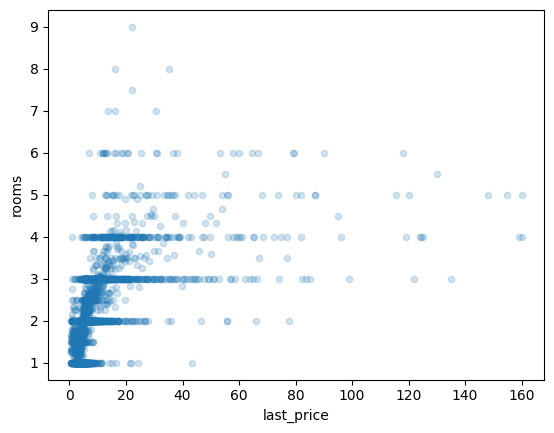

In [109]:
price_rooms.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2)

In [110]:
price_rooms.corr()

,last_price,rooms
last_price,1.000000,0.537122
rooms,0.537122,1.000000


Here, there is also a positive linear correlation, but it can be described as moderate, which means that as the number of rooms increases, the price of the apartment tends to increase as well, and vice versa.

Let's calculate the correlation between the price and the floor.

In [111]:
price_tfloor = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
price_tfloor

,last_price
floor_type,
другой,6.500757
первый,4.752166
последний,6.331924


<Axes: xlabel='floor_type'>

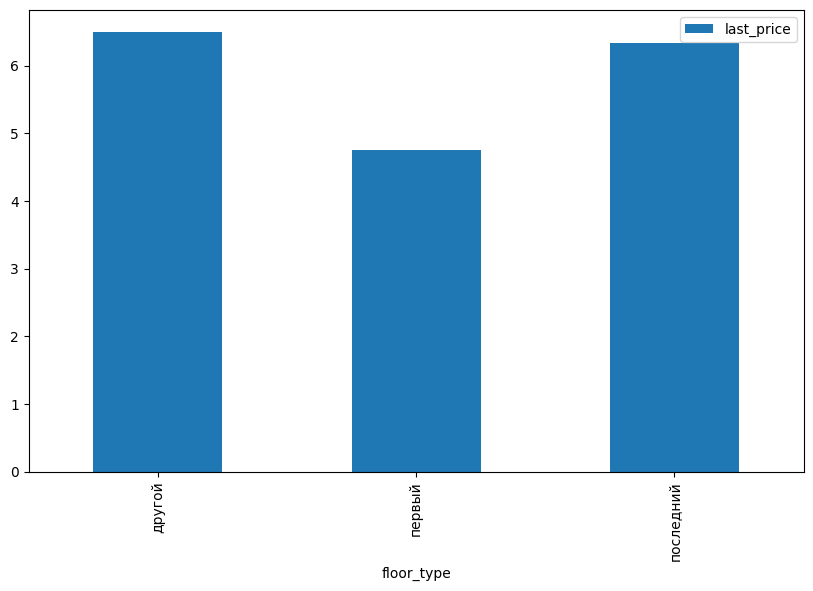

In [112]:
price_tfloor.plot(kind='bar', figsize=(10, 6))

From the graph, we observe that the cheapest apartments are located on the first floor, with an average price of 4,679,219. Next are the apartments on the top floor, with an average price of 5,981,392. The most expensive apartments are located on floors between the first and last, with an average price of 6,701,936.

Let's calculate the correlation between price and the publication date.

In [113]:
price_date_weekday = data.pivot_table(index='weekday',values='last_price')
price_date_weekday

,last_price
weekday,
0,6.322722
1,6.226170
2,6.135280
3,6.629187
4,6.187086
5,5.894671
6,6.171822


<Axes: xlabel='weekday'>

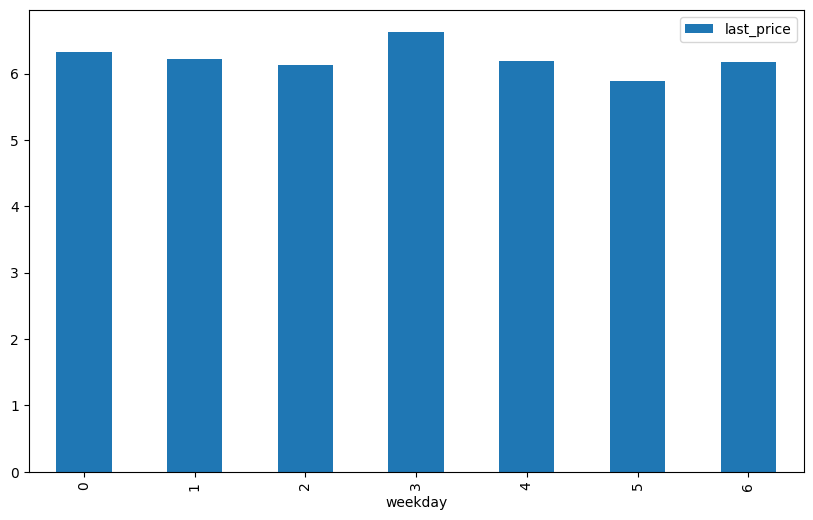

In [114]:
price_date_weekday.plot(kind='bar', figsize=(10, 6))

From the chart, we observe that the price values do not vary significantly by day of the week. What can be noted is that the lower average price is typical for Saturday, while the higher one is seen on Thursday.

In [115]:
price_date_month = data.pivot_table(index='month',values='last_price')
price_date_month

,last_price
month,
1,6.454922
2,6.318954
3,6.046392
4,6.287635
5,6.223292
6,6.188460
7,6.340222
8,6.322404
9,6.299742


<Axes: xlabel='month'>

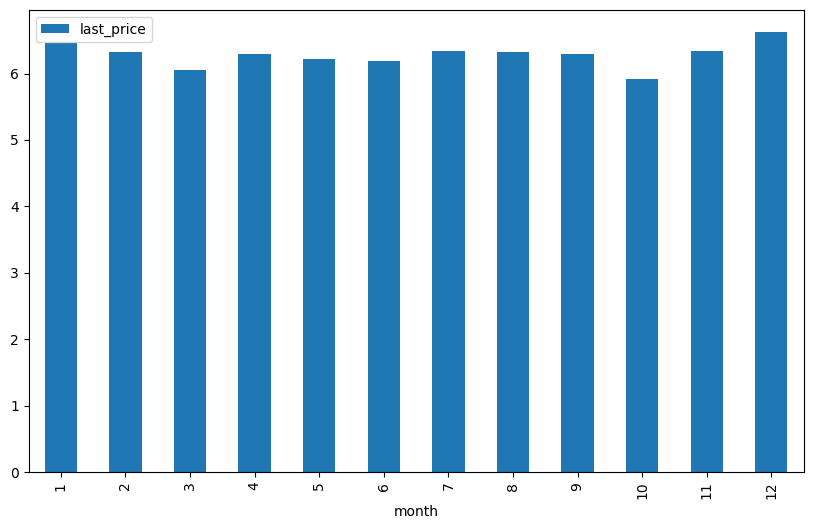

In [116]:
price_date_month.plot(kind='bar', figsize=(10, 6))

Similarly, for the months, we observe a similar situation – the difference is not significant. What can be noted is that the highest prices are typical for the beginning and end of the year – January and December.

In [117]:
price_date_year = data.pivot_table(index='year',values='last_price')
price_date_year

,last_price
year,
2014,11.934759
2015,8.037223
2016,6.343977
2017,6.167742
2018,5.883229
2019,6.490498


<Axes: xlabel='year'>

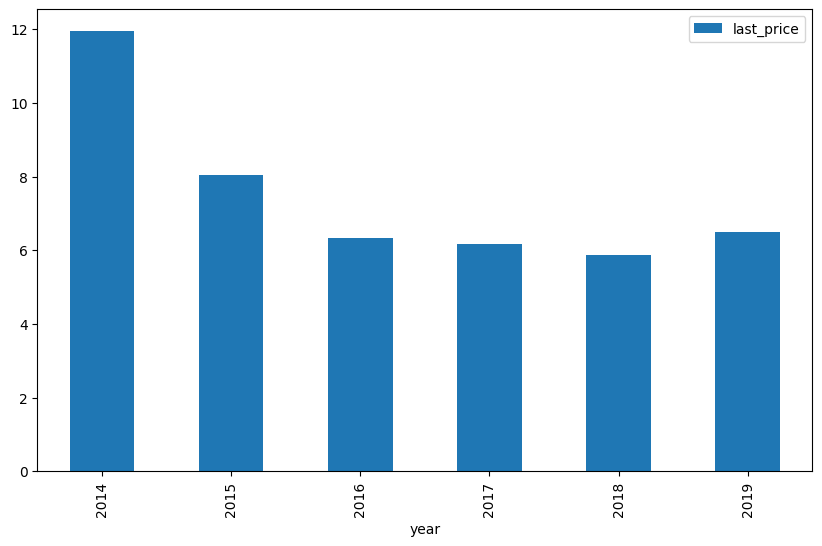

In [118]:
price_date_year.plot(kind='bar', figsize=(10, 6))

Here, we can observe a downward trend. The highest average price is characteristic of 2014, then the price decreases until 2018, with a slight increase noticeable in 2019.

In [119]:
top_locality = data['locality_name'].value_counts().head(10) # We group the data by settlements and count the number of listings in each settlement.

In [120]:
selected_data = data.query('locality_name in @top_locality.index') # We select only the rows that correspond to the chosen settlements.

In [121]:
selected_data['price_sqr_meter'] = round((selected_data['last_price'] / selected_data['total_area']),2) # We create a column with the average price.

C:\Users\Артемий Иванилов\AppData\Local\Temp\ipykernel_20396\3021529679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['price_sqr_meter'] = round((selected_data['last_price'] / selected_data['total_area']),2) # We create a column with the average price.


In [122]:
pivot_table = selected_data.pivot_table(index='locality_name',values='price_sqr_meter',aggfunc=['mean','count']) # создаем сводную таблицу со средними значениями цены за квадрытный метр по регионам
pivot_table_sorted = pivot_table.sort_values(by=('count', 'price_sqr_meter'), ascending=False)
pivot_table_sorted.columns = ['price_sqr_meter', 'count']
pivot_table_sorted

,price_sqr_meter,count
locality_name,,
Санкт-Петербург,0.113327,14412
Мурино,0.086205,498
поселок Шушары,0.078728,401
Всеволожск,0.069071,366
Пушкин,0.103430,344
Колпино,0.075229,327
поселок Парголово,0.090909,297
Гатчина,0.068836,292
деревня Кудрово,0.092439,246


In [123]:
highest_price = pivot_table_sorted['price_sqr_meter'].idxmax()
print(f"Населенный пункт с самой высокой ценой квадратного метра является {highest_price}")

Населенный пункт с самой высокой ценой квадратного метра является Санкт-Петербург


In [124]:
lowest_price = pivot_table_sorted['price_sqr_meter'].idxmin()
print(f"Населенный пункт с самой низкой ценой квадратного метра является {lowest_price}")

Населенный пункт с самой низкой ценой квадратного метра является Гатчина


We will highlight the apartments in Saint Petersburg using the locality_name column and calculate the average price for each kilometer. Then, we will find how the property price depends on the distance to the city center by plotting a graph of the average price change for each kilometer from the center of Saint Petersburg.

In [125]:
spb_flats = data.query('locality_name == "Санкт-Петербург"')

In [126]:
price_per_km = spb_flats.pivot_table(index='cityCenters_nearest_meters', values='price_sqr_meter', aggfunc='mean')
price_per_km.reset_index(inplace=True)
price_per_km

,cityCenters_nearest_meters,price_sqr_meter
0,0.0,250756.186667
1,1.0,155549.156474
2,2.0,157217.274669
3,3.0,119787.259043
4,4.0,128951.753908
5,5.0,135486.555324
6,6.0,146841.768634
7,7.0,153961.753055
8,8.0,123475.263916
9,9.0,113040.003578


<Axes: xlabel='cityCenters_nearest_meters', ylabel='price_sqr_meter'>

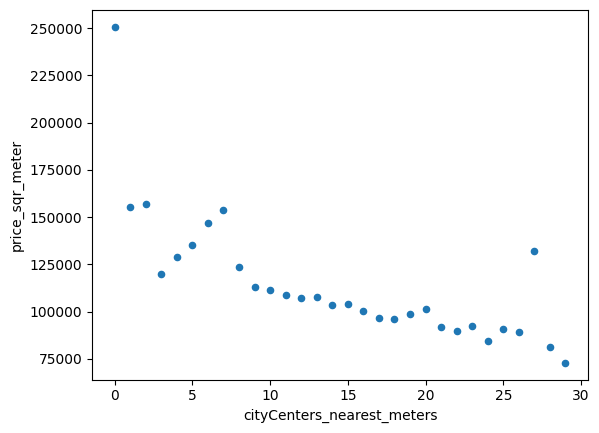

In [127]:
price_per_km.plot(x='cityCenters_nearest_meters', y='price_sqr_meter', kind='scatter', alpha=1)

In [128]:
price_per_km.corr()

,cityCenters_nearest_meters,price_sqr_meter
cityCenters_nearest_meters,1.000000,-0.742348
price_sqr_meter,-0.742348,1.000000


Here, we can observe a strong negative linear correlation, which means that as the distance to the center increases, the apartment price decreases, and vice versa.

### Сonclusion

The goal of the study was to conduct an exploratory data analysis that would help establish parameters influencing the prices of properties.

As introductory information, we had access to data from Yandex Real Estate — an archive of apartment sale ads in St. Petersburg and surrounding settlements over several years. Before proceeding directly to the analysis and answering the questions posed by the client, it was necessary to prepare the data for further work. The following steps were carried out during the data preprocessing:

- The pandas library was imported, and data was read from the provided dataframe.
- We examined and checked the basic information about the dataframe: the number of rows and columns, data types, and missing values. During the examination, histograms were created for all columns of the dataframe.
- Missing values in the 'is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000' columns were processed using a loop and the fillna() method. Unfortunately, missing values in other columns were not handled due to incomplete data.
- Using the .sum() method, we confirmed that there were no more missing values in the dataframe.
- Then, for more convenient work, the data type of the 'first_day_exposition' column was changed from object to datetime64 using the .to_datetime() method.
- The 'is_apartment' column was converted from object to bool using the .astype() method.
- Values in the 'balcony', 'parks_around3000', 'ponds_around3000' columns were changed from float64 to int64.
- Next, we dealt with implicit duplicates, which were identified using the .unique() and .nunique() methods, and eliminated them using the .replace() method.
- The following columns were added:
    - price per square meter;
    - day of the week the listing was posted (0 — Monday, 1 — Tuesday, and so on);
    - month the listing was posted;
    - year the listing was posted;
    - floor type of the apartment ("first", "last", "other");
    - distance to the city center in kilometers.
Once the data was ready, we proceeded to exploratory data analysis.

We created a histogram for the total area column. During the histogram creation, several values above 250 square meters stood out. These values are suspicious as they are quite large for a single apartment. The difference between total and living area for these apartments is also suspicious. For example, 900 square meters of total area and 410 square meters of living area. Some of these apartments are on the top floor, so one might assume there is a terrace. However, this still seems suspicious, so we removed these apartments from the dataframe. Apartments over 400 square meters can be explained for the first and last floors. In the first case, commercial spaces might be involved, and in the second, penthouses. However, apartments with such large areas on other floors are difficult to explain, and these values are suspected to be outliers, so we removed them as well. After that, we created the histogram again, and the mean and median became close to each other, which may indicate the absence of significant outliers.

Next, we created a histogram for the living area column. The median and the 25th percentile are close to each other, indicating that most of the data is concentrated within this range. 75% of the data lies below 42 square meters, which is also visible in the histogram. After processing the total area values, we also eliminated outliers for the living area. Therefore, we left this data unchanged.

Next, we created a histogram for the kitchen area column. The data distribution relative to the mean is not too wide, indicating that the values are fairly concentrated around the mean. There are also large values, but we have already described them in the total area column, so this data can be left unchanged.

Next, we created a histogram for the price column. The average property price is approximately 6.54 million rubles. The median is 4.65 million rubles. The standard deviation is 10.89 million rubles, indicating a large price spread. 75% of the observations have prices less than or equal to 6.8 million rubles. This suggests a large price variation, which is typical for the real estate market, where different property types are presented. However, significantly outlying and suspicious values were removed from the dataframe.

Next, we created a histogram for the number of rooms column. Apartments with 0 rooms raised suspicion. This is not possible. Most likely, the seller forgot to specify the number of rooms in the apartment — we removed the rows with 0 rooms. Also, for apartments with a living area smaller than 200 square meters, it is unlikely to have 10 or more rooms. We removed these rows from the dataframe.

Next, we created a histogram for the ceiling height column, where we found and corrected several errors. These were most likely typographical mistakes made by people filling out the form — a recommendation for the client is to set the maximum value for ceiling height.

Next, we created histograms for the floor type column, total number of floors, proximity to the city center, and nearby parks, where no deviations were found.

Next, we created a histogram for the apartment sale duration. We can say that fast sales can be considered those that are completed within the first quartile (25%) of the sales duration, i.e., less than 45 days. Sales that take more than 238 days (75% of all sales) can be considered unusually long.

In the final part of the study, we focused on the relationship between price and different parameters to identify factors affecting property prices. We arrived at the following hypotheses:

- Price/total area (strong positive linear correlation) — the larger the apartment area, the higher its price, and vice versa.
- Price/living area (strong positive linear correlation) — the larger the living area, the higher the apartment's price, and vice versa.
- Price/kitchen area (moderate positive linear correlation) — as the kitchen area increases, the price of the apartment tends to increase as well, and vice versa.
- Price/number of rooms (moderate positive linear correlation) — as the number of rooms increases, the price of the apartment tends to increase, and vice versa.
- The cheapest apartments are those on the first floor — 4,679,219. Next come the apartments on the top floor — 5,981,392. The most expensive apartments are those located on floors between the first and last — 6,701,936.
- The day of the week and the month of posting do not correlate with the price, with only small differences observed. However, the year matters — the highest average price corresponds to 2014, after which the price decreases until 2018, with a slight increase in 2019.
- The settlement with the highest price per square meter is St. Petersburg.
- The settlement with the lowest price per square meter is Vyborg.
- For apartments in St. Petersburg, we observe a negative linear correlation when looking at the relationship between price and distance from the center — as the distance from the center increases, the price of the apartment decreases, and vice versa.

Based on the obtained data, we can formulate the following hypothesis:

- The price is influenced by the apartment area (the larger the area, the higher the price).
- The floor (the most expensive apartments are between the first and last floors).
- The region — the most expensive apartments are in large cities, such as St. Petersburg.
- The distance from the center — as it decreases, prices increase.